<a href="https://colab.research.google.com/github/Soliloquiess/ALGORITHM/blob/main/fasion_mnist_ipynb_0601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN을 이용한 영상 분류

- 패션 MNIST 데이터 세트 분류

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


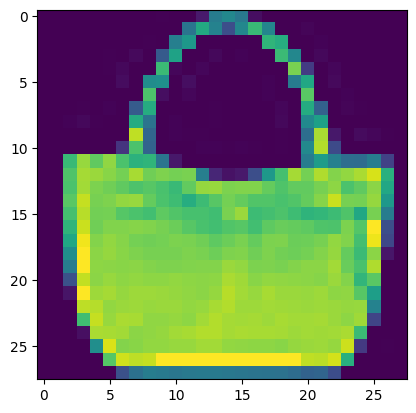

In [ ]:
plt.imshow(train_images[100])

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
# 데이터 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# 모델 구축
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
# 신경망 훈련하기
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4943 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3743 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3364 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3129 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2926 - accuracy: 0.8914


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8690
정확도: 0.8690000176429749


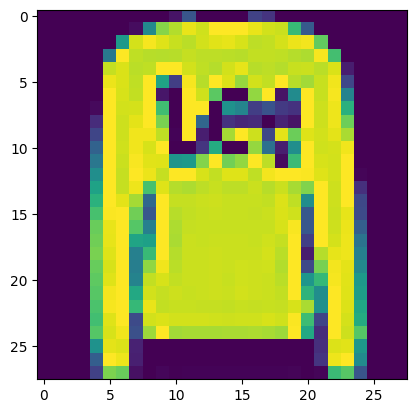

In [ ]:
plt.imshow(test_images[1])

In [ ]:
str_label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']
p = model.predict(test_images[[1]])
print(p)
print('인식 결과 : ',str_label[p.argmax()], end='')

1/1 [==============================] - 0s 79ms/step
[[3.6140664e-05 4.0670843e-12 9.8574531e-01 1.3887823e-08 1.1400322e-02
  4.0874616e-11 2.8182599e-03 2.2119101e-12 7.1358293e-09 6.1513864e-13]]
인식 결과 :  Pullover

# CNN을 이용한 영상 분류

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images_cnn, train_labels_cnn),(test_images_cnn, test_labels_cnn) = fashion_mnist.load_data()

In [ ]:
train_images_cnn = train_images_cnn.reshape((60000,28,28,1))
test_images_cnn = test_images_cnn.reshape((10000,28,28,1))

## 데이터 정규화하기

In [ ]:
train_image_cnn = train_images_cnn / 255.0
test_image_cnn = test_images_cnn / 255.0

## 컨볼루션 신경망 구축하기
- Conv2D
- MaxPooling2D  
위의 두 층을 번갈아 쌓아서 컨볼루션 신경망 구축  
노드의 활성화 함수 : ReLU

In [ ]:
# 컨볼루션 신경망 구축하기
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(layers.MaxPooling2D((2,2)))
cnn_model.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2,2)))
cnn_model.add(layers.Conv2D(64, (3,3), activation='relu'))

## 완전연결 계층 추가
- 이미지를 분류하려면 모델의 끝에 Dense 계층을 추가해야 함  
- 1차원 배열을 입력으로 받으므로 Flatten계층을 추가하여 3->1 차원으로 변환
- 64개의 노드를 가지는 은닉층과 10개의 노드를 가지는 출력계층(소프트맥스)을 추가한다.

In [ ]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# 모델 컴파일
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
# 훈련
cnn_model.fit(train_images_cnn, train_labels_cnn, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 56s 29ms/step - loss: 0.5367 - accuracy: 0.8214
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3403 - accuracy: 0.8755
Epoch 3/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3058 - accuracy: 0.8876
Epoch 4/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2804 - accuracy: 0.8968
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2617 - accuracy: 0.9025


In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images_cnn, test_labels_cnn)
print('정확도:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.3028 - accuracy: 0.8938
정확도: 0.8938000202178955


In [ ]:
# 예측 테스트 해 보기
str_label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']
pred = cnn_model.predict(test_images_cnn[[1]])
print('인식 결과 : ',str_label[pred.argmax()], end='')

1/1 [==============================] - 0s 157ms/step
인식 결과 :  Pullover

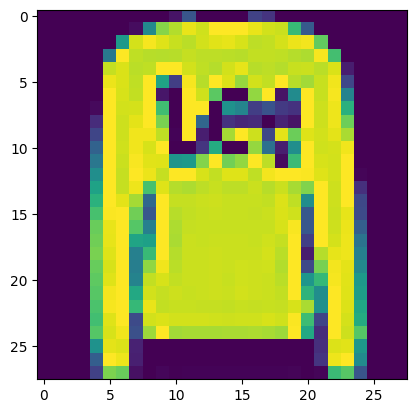

In [ ]:
plt.imshow(test_images[1])